# Credit Card Fraud Detection

## Contents

* [1. Introduction](#1)
    * [1.1 References](#1.1)
* [2. Getting Started](#2)
* [3. Train/Test Split](#3)
* [4. Exploratory Data Analysis](#4)
    * [4.1 Time](#4.1)
    * [4.2 Amount](#4.2)
    * [4.3 V1-V28](#4.3)
* [5. Mutual Information between Fraud and the Predictors](#5)
* [6. Modeling](#6)
    * [6.1 Logistic Regression and Support Vector Classifier](#6.1)
    * [6.2 Random Forest](#6.2)
* [7. Test Set Evaluation of the Best Model](#7)
* [8. Conclusion](#8)

# 1. Introduction
<a id='1'></a>

In this project we analyze a dataset of credit card transactions made over a two-day period in September 2013 by European cardholders. The dataset contains 284,807 transactions, of which 492 (0.17%) are fraudulent.

Each transaction has 30 features, all of which are numerical. The features `V1, V2, ..., V28` are the result of a PCA transformation. To protect confidentiality, background information on these features is not available. The `Time` feature contains the time elapsed since the first transaction, and the `Amount` feature contains the transaction amount. The response variable, `Class`, is 1 in the case of fraud, and 0 otherwise.

Our goal in this project is to construct models to predict whether a credit card transaction is fraudulent. We'll attempt a supervised learning approach. We'll also create visualizations to help us understand the structure of the data and unearth any interesting patterns.

## 1.1 References
<a id='1.1'></a>

* [Kaggle Dataset](https://www.kaggle.com/mlg-ulb/creditcardfraud)
* [GitHub Repository](https://github.com/anushkadixit1708/AI-Farud-Detection) - The GitHub repository for this project

# 2. Getting Started
<a id='2'></a>

Import basic libraries:

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

# Plotting options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

Read in the data into a pandas dataframe.

In [2]:
transactions = pd.read_csv('creditcard.csv\creditcard.csv')

Check basic metadata.

In [3]:
transactions.shape

(284807, 31)

In [4]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Are there any variables with missing data?

In [5]:
transactions.isnull().any().any()

False

No! Let's view five randomly chosen transactions.

In [6]:
transactions.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
67896,52743.0,1.187739,1.230910,-1.487495,1.583387,0.767106,-1.630207,0.659505,-0.236336,-0.675900,-1.373628,2.652284,0.118138,-0.554042,-3.110492,0.388159,1.186538,2.547878,1.798447,-0.623661,-0.048412,-0.147940,-0.380062,-0.193237,0.202649,0.789753,-0.323472,0.034238,0.088446,2.29,0
219606,141800.0,1.825068,-0.296433,-0.352590,1.183736,-0.358249,-0.012080,-0.432680,0.026869,0.506497,0.337201,0.659576,1.377673,1.123819,-0.010923,-0.006501,0.708785,-1.212891,0.830242,-0.378255,-0.043717,0.302741,0.913479,0.022035,-0.320467,-0.063419,-0.571053,0.048373,-0.030719,65.00,0
220578,142230.0,-0.071178,0.699249,-0.090408,-0.856609,0.852422,-1.264376,1.112092,-0.339805,0.129547,-0.791999,1.068434,-0.351758,-1.668050,-0.676115,-0.341138,0.619809,-0.172758,1.146629,-0.949479,-0.269875,0.230693,0.746720,-0.379695,-0.036748,0.284140,-0.274747,-0.332811,-0.282155,14.50,0
152971,97693.0,0.647401,-0.774689,0.372791,-0.649799,-0.855406,0.282129,-0.816157,-0.085161,-1.116521,1.524837,1.717333,-2.712531,2.819814,1.138262,-0.558567,-1.452191,1.788285,1.209967,2.485301,0.147219,0.009696,0.730503,0.501343,0.723632,-1.920927,-0.085778,0.351588,0.324848,78.65,0
241055,150864.0,-1.115535,1.582132,-1.187059,-0.742868,1.062390,-0.447038,0.951434,-0.023561,0.622554,0.541561,0.244114,-0.505507,-1.004881,-0.905814,0.317615,0.391540,-0.046896,1.556199,0.397932,0.362224,0.100809,0.894281,-0.447812,-1.195886,-0.266683,-0.144326,0.237207,-0.064561,24.04,0


How balanced are the classes, i.e. how common are fraudulent transactions?

In [7]:
transactions['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
transactions['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

Only 0.17% (492 out of 284,807) transactions are fraudulent.

# 3. Train/Test Split
<a id='3'></a>

Before we begin preprocessing, we split off a test data set. First split the data into features and response variable:

In [9]:
X = transactions.drop(labels='Class', axis=1) # Features
y = transactions.loc[:,'Class']               # Response
del transactions                              # Delete the original data

We'll use a test size of 20%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
del X, y

In [12]:
X_train.shape

(1642, 30)

In [13]:
X_test.shape

(280607, 30)

In [14]:
# Prevent view warnings
X_train.is_copy = False
X_test.is_copy = False

# 4. Exploratory Data Analysis
<a id='4'></a>

We conduct EDA only on the training set, and leave the test set unknown.

## 4.1 Time
<a id='4.1'></a>

Few descriptive statistics for the `Time` variable:

In [15]:
X_train['Time'].describe()

count      1642.000000
mean      92433.306943
std       48242.962200
min         130.000000
25%       52914.500000
50%       84956.000000
75%      137195.500000
max      172751.000000
Name: Time, dtype: float64

Let's convert the time from seconds to hours to ease the interpretation.

In [16]:
X_train.loc[:,'Time'] = X_train.Time / 3600
X_test.loc[:,'Time'] = X_test.Time / 3600

What is the time of the last transaction, in days?

In [17]:
X_train['Time'].max() / 24

1.9994328703703703

So the transactions indeed occur over a two-day period. Next let's plot a histogram of transaction times, with one bin per hour:

C:\Users\anush\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Transaction Times')

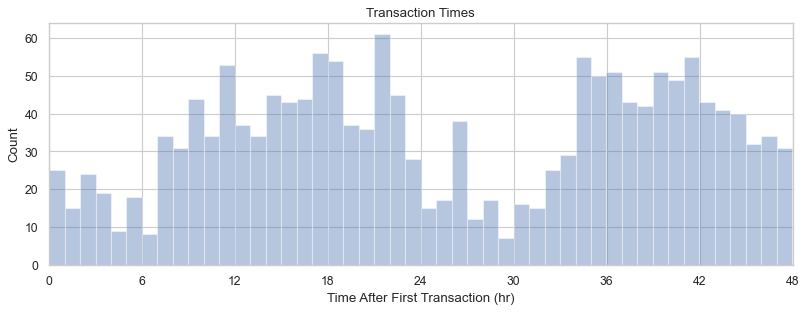

In [18]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['Time'], bins=48, kde=False)
plt.xlim([0,48])
plt.xticks(np.arange(0,54,6))
plt.xlabel('Time After First Transaction (hr)')
plt.ylabel('Count')
plt.title('Transaction Times')

It looks like there are two lulls in credit card transactions during nighttime on each day.

## 4.2 Amount
<a id='4.2'></a>

Summary statistics:

In [19]:
X_train['Amount'].describe()

count    1642.000000
mean      101.257400
std       241.643296
min         0.000000
25%         3.790000
50%        22.010000
75%        88.900000
max      2793.600000
Name: Amount, dtype: float64

Comparing the different quantiles, it looks like the amounts are very right-skewed. To verify this, plot a histogram of the transaction amounts:

Text(0.5, 1.0, 'Transaction Amounts')

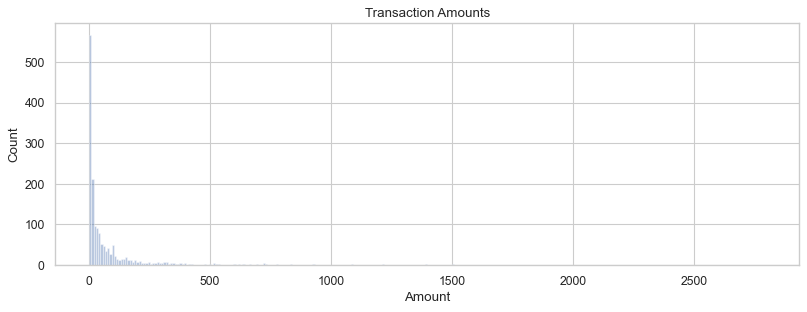

In [20]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['Amount'], bins=300, kde=False)
plt.ylabel('Count')
plt.title('Transaction Amounts')

The histogram is hard to read due to some outliers we can't see. A boxplot will show the outliers:

C:\Users\anush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Transaction Amounts')

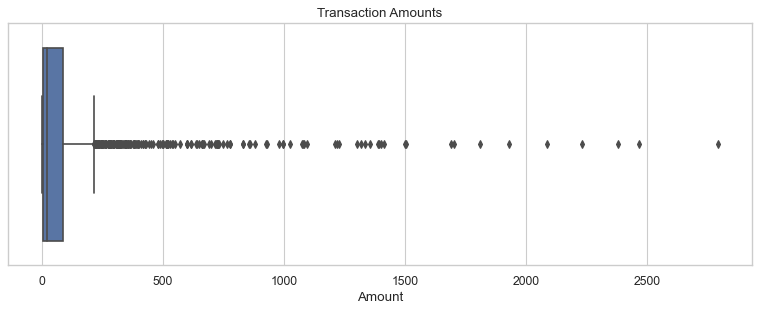

In [21]:
plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(X_train['Amount'])
plt.title('Transaction Amounts')

We can see there are no outliers on the left and many outliers on the right. So the amounts certainly seem right-skewed. We can calculate the skewness to be sure:

In [22]:
X_train['Amount'].skew()

5.364167630279151

That's a strong right skew. Let's use a power transform to bring the transaction amounts closer to a normal distribution. We'll use the [Box-Cox transform in SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html), but some of the amounts are zero (min = 0 above), so we need to shift the amounts first to make them positive. We'll shift by a very small amount, just $10^{-9}$.

In [23]:
X_train.loc[:,'Amount'] = X_train['Amount'] + 1e-9 # Shift all amounts by 1e-9

Perform the Box-Cox transform:

In [24]:
X_train.loc[:,'Amount'], maxlog, (min_ci, max_ci) = sp.stats.boxcox(X_train['Amount'], alpha=0.01)

The maximum likelihood estimate of $\lambda$ in the Box-Cox transform:

In [25]:
maxlog

0.14949765833649528

The 99% confidence interval for $\lambda$:

In [26]:
(min_ci, max_ci)

(0.13516924575449346, 0.16475064326517136)

Plot the newly transformed amounts:

C:\Users\anush\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Transaction Amounts (Box-Cox Transformed)')

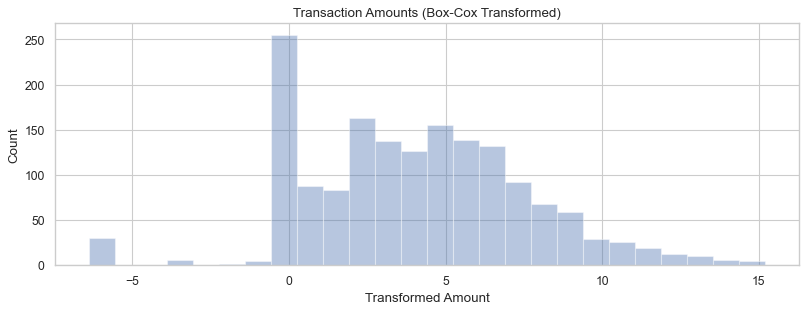

In [27]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['Amount'], kde=False)
plt.xlabel('Transformed Amount')
plt.ylabel('Count')
plt.title('Transaction Amounts (Box-Cox Transformed)')

Much better. The distribution appears to be bimodal, suggesting a divide between "small" and "large" purchases. Now let's check the descriptive stats of the transformed amounts:

In [28]:
X_train['Amount'].describe()

count    1642.000000
mean        4.043222
std         3.537242
min        -6.387152
25%         1.474327
50%         3.929945
75%         6.394366
max        15.216731
Name: Amount, dtype: float64

What's the skewness of the transformed amounts? (Zero skewness would be ideal.)

In [29]:
X_train['Amount'].skew()

0.03461653644260046

So our power transform removed most of the skewness in the `Amount` variable. Now we need to compute the Box-Cox transform on the test data amounts as well, using the $\lambda$ value estimated on the training data.

In [30]:
X_test.loc[:,'Amount'] = X_test['Amount'] + 1e-9 # Shift all amounts by 1e-9

In [31]:
X_test.loc[:,'Amount'] = sp.stats.boxcox(X_test['Amount'], lmbda=maxlog)

## 4.3 V1-V28
<a id='4.3'></a>

Let's compare the descriptive stats of the PCA variables `V1-V28`.

In [33]:
pca_vars = ['V%i' % k for k in range(1,29)]

Full table of descriptive stats:

In [34]:
X_train[pca_vars].describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000
mean,-1.061141,0.835007,-1.621241,1.098603,-0.748050,-0.327042,-1.258980,0.161707,-0.616610,-1.280203,0.899395,-1.493096,-0.035251,-1.645381,-0.042368,-0.972466,-1.493681,-0.503893,0.141210,0.092545,0.197261,-0.007395,-0.025729,-0.010196,-0.003560,0.014282,0.049803,0.028894
std,4.112756,2.842036,4.684822,2.674662,3.079729,1.570857,4.200748,3.540338,1.840953,3.454796,2.263710,3.588161,1.026649,3.708228,0.932484,2.666550,4.421148,1.830252,1.089781,0.883990,2.005762,0.973453,0.937508,0.575586,0.605316,0.478832,0.689135,0.332594
min,-30.552380,-12.040133,-31.103685,-3.566075,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,-24.588262,-2.697275,-18.431131,-3.252466,-19.214325,-4.498945,-14.129855,-25.162799,-9.335193,-3.681904,-6.053915,-22.797604,-8.887017,-19.254328,-2.176990,-4.781606,-1.363879,-7.263482,-3.398699
25%,-1.374446,-0.431227,-1.853534,-0.593051,-1.071590,-1.020999,-1.043627,-0.197431,-1.235018,-1.122900,-0.529750,-1.584790,-0.745897,-1.421193,-0.613034,-1.112768,-0.808135,-0.851533,-0.464439,-0.220137,-0.191564,-0.542228,-0.187496,-0.358508,-0.345671,-0.309224,-0.069411,-0.055288
50%,-0.342491,0.318434,-0.310425,0.412981,-0.227877,-0.421628,-0.131725,0.064905,-0.304473,-0.262418,0.340180,-0.180370,-0.022546,-0.213710,0.005723,-0.155018,-0.159680,-0.112363,0.048820,-0.035124,0.041177,0.023278,-0.012401,0.026942,0.024720,-0.046226,0.017313,0.020603
75%,1.204791,1.288695,0.831732,2.074103,0.525445,0.234016,0.482510,0.495366,0.446712,0.284318,1.441860,0.444985,0.669722,0.356090,0.625061,0.417834,0.398843,0.479282,0.639804,0.258060,0.338593,0.555808,0.164366,0.418337,0.362116,0.295834,0.200139,0.134712
max,2.342858,22.057729,4.017561,11.927512,11.095089,6.933729,8.866539,20.007208,7.173635,11.304842,12.018913,4.031820,3.085741,5.609111,2.471358,3.139656,6.739384,3.790316,5.228342,11.059004,27.202839,8.361985,5.466230,1.529283,2.208209,2.745261,3.307712,2.292313


It's tedious to interpret this table, so let's make some visualizations. We'll start by plotting the means:

Text(0.5, 1.0, 'V1-V28 Means')

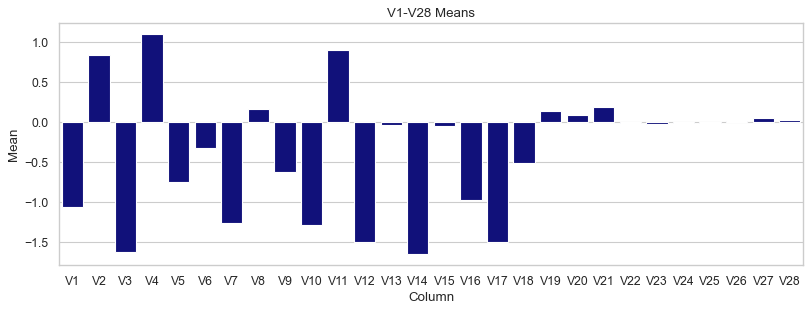

In [35]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].mean(), color='darkblue')
plt.xlabel('Column')
plt.ylabel('Mean')
plt.title('V1-V28 Means')

All of `V1-V28` have approximately zero mean. Now plot the standard deviations:

Text(0.5, 1.0, 'V1-V28 Standard Deviations')

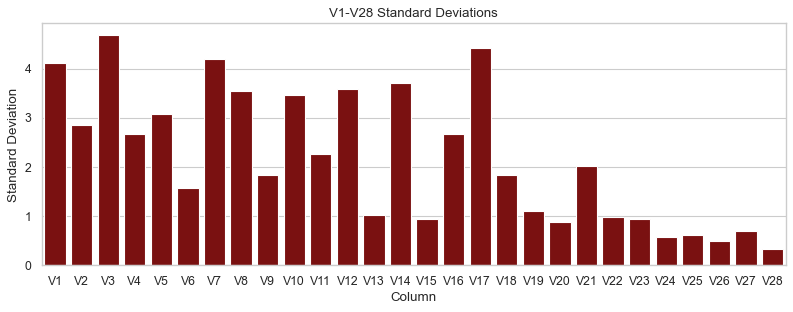

In [36]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].std(), color='darkred')
plt.xlabel('Column')
plt.ylabel('Standard Deviation')
plt.title('V1-V28 Standard Deviations')

The PCA variables have roughly unit variance, but as low as ~0.3 and as high as ~1.9. Plot the skewnesses next:

Text(0.5, 1.0, 'V1-V28 Skewnesses')

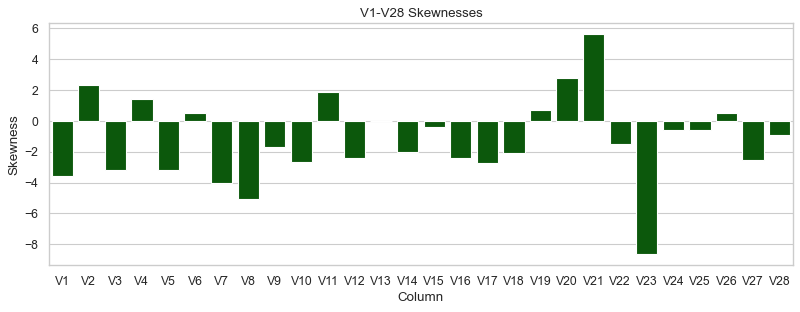

In [37]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].skew(), color='darkgreen')
plt.xlabel('Column')
plt.ylabel('Skewness')
plt.title('V1-V28 Skewnesses')

A few of the PCA variables are significantly skewed. Let's plot a histogram of one of the particularly skewed variables, `V8`, to see the distribution in detail.

C:\Users\anush\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'V8')

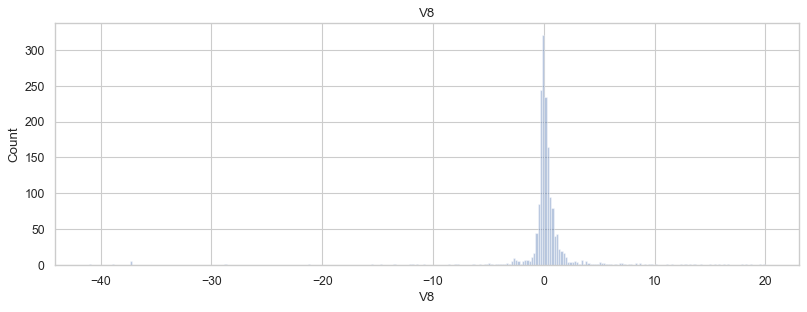

In [38]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['V8'], bins=300, kde=False)
plt.ylabel('Count')
plt.title('V8')

The histogram doesn't show us outliers. Let's try a boxplot:

C:\Users\anush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'V8')

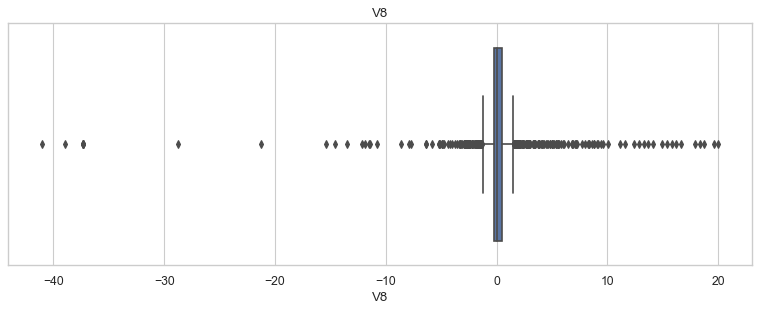

In [39]:
plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(X_train['V8'])
plt.title('V8')

The boxplot is also hard to read due to the large number of outliers, which indicates high kurtosis in `V8`. This motivates us to plot the kurtoses of the PCA variables. The kurtosis method employed in pandas is Fisher’s definition, for which the standard normal distribution has kurtosis 0.

Note the log scale on the y-axis in the plot below:

Text(0.5, 1.0, 'V1-V28 Kurtoses')

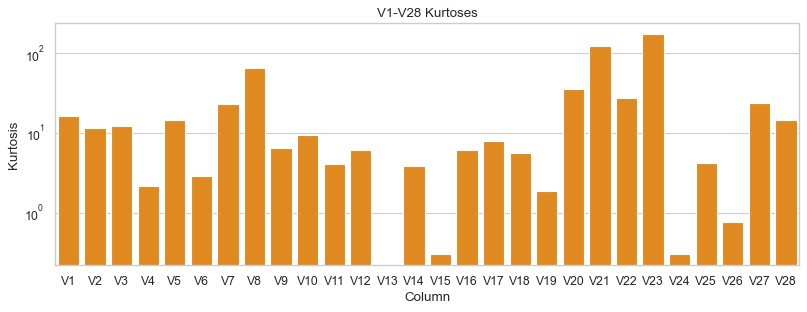

In [40]:
plt.figure(figsize=(12,4), dpi=80)
plt.yscale('log')
sns.barplot(x=pca_vars, y=X_train[pca_vars].kurtosis(), color='darkorange')
plt.xlabel('Column')
plt.ylabel('Kurtosis')
plt.title('V1-V28 Kurtoses')

We've learned that many of the PCA variables are heavy-tailed. The large numbers of outliers in `V1-V28` motivates us to consider robust descriptive statistics. Let's plot the medians:

Text(0.5, 1.0, 'V1-V28 Medians')

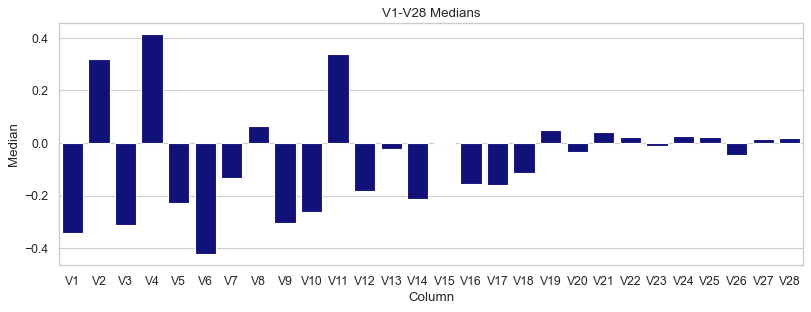

In [41]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].median(), color='darkblue')
plt.xlabel('Column')
plt.ylabel('Median')
plt.title('V1-V28 Medians')

The medians are also roughly zero. Next let's look at the interquartile ranges (IQR)*:

*Pandas does not have a built-in IQR method, but we can use the [`quantile`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.quantile.html) method to calculate the IQR.

Text(0.5, 1.0, 'V1-V28 IQRs')

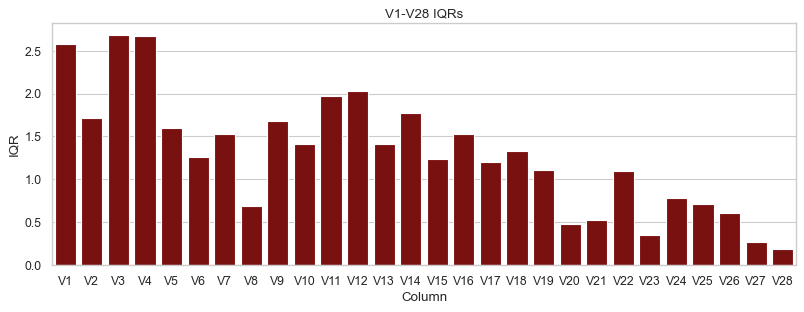

In [42]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].quantile(0.75) - X_train[pca_vars].quantile(0.25), color='darkred')
plt.xlabel('Column')
plt.ylabel('IQR')
plt.title('V1-V28 IQRs')

The IQRs of `V1-V28` are on a similar scale as the standard deviations.

# 5. Mutual Information between Fraud and the Predictors
<a id='5'></a>

[Mutual information](https://en.wikipedia.org/wiki/Mutual_information) is a non-parametric method to estimate the mutual dependence between two variables. Mutual information of 0 indicates no dependence, and higher values indicate higher dependence. According to the [sklearn User Guide](http://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection), "mutual information methods can capture any kind of statistical dependency, but being nonparametric, they require more samples for accurate estimation." We have 227,845 training samples, so mutual information should work well. Because the target variable is discrete, we use [`mutual_info_classif`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif) (as opposed to [`mutual_info_regression`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression) for a continuous target).

In [43]:
from sklearn.feature_selection import mutual_info_classif

In [44]:
mutual_infos = pd.Series(data=mutual_info_classif(X_train, y_train, discrete_features=False, random_state=1), index=X_train.columns)

The calculated mutual informations of each variable with `Class`, in descending order:

In [45]:
mutual_infos.sort_values(ascending=False)

V14       0.394476
V17       0.370166
V10       0.361705
V12       0.334941
V11       0.321570
V4        0.301208
V3        0.282378
V16       0.269494
V7        0.244984
V2        0.216069
V9        0.199601
V27       0.186795
V21       0.184152
V18       0.175403
V1        0.157867
V6        0.154948
V28       0.140208
V5        0.129992
Amount    0.126033
Time      0.117537
V8        0.115669
V19       0.096085
V20       0.092927
V23       0.065111
V24       0.039981
V15       0.024805
V25       0.020511
V22       0.019040
V26       0.015325
V13       0.008094
dtype: float64

The five most correlated variables with `Class` are, in decreasing order, V17, V14, V10, V12, and V11.

# 6. Modeling
<a id='6'></a>

Now we're ready to build machine learning models to predict whether a transaction is fraudulent. We'll train the following models:
* Logistic regression
* Support vector classifier
* Random forest

## 6.1 Logistic Regression and Support Vector Classifier
<a id='6.1'></a>

The class [`SGDClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) implements multiple linear classifiers with SGD training, which makes learning much faster on large datasets. We'll implement the model as a machine learning pipeline that includes [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) for data standardization (rescaling each variable to zero mean and unit variance).

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

In [47]:
pipeline_sgd = Pipeline([
    ('scaler', StandardScaler(copy=False)),
    ('model', SGDClassifier(max_iter=1000, tol=1e-3, random_state=1, warm_start=True))
])

We'll conduct a grid search over several hyperparameter choices. The search uses 5-fold cross-validation with stratified folds. The type of linear classifier is chosen with the `loss` hyperparameter. For a linear SVC we set `loss = 'hinge'`, and for logistic regression we set `loss = 'log'`.

Set the hyperparameter grids to search over, one grid for the linear SVC and one for logistic regression:

In [48]:
param_grid_sgd = [{
    'model__loss': ['log'],
    'model__penalty': ['l1', 'l2'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20)
}, {
    'model__loss': ['hinge'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20),
    'model__class_weight': [None, 'balanced']
}]

The grid search, implemented by [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), uses [`StratifiedKFold`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) with 5 folds for the train/validation splits. We'll use [`matthews_corrcoef`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html) (the [Matthews correlation coefficient](https://en.wikipedia.org/wiki/Matthews_correlation_coefficient), MCC) as our scoring metric.

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef

In [50]:
MCC_scorer = make_scorer(matthews_corrcoef)
grid_sgd = GridSearchCV(estimator=pipeline_sgd, param_grid=param_grid_sgd, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

Perform the grid search:

In [51]:
import warnings
with warnings.catch_warnings(): # Suppress warnings from the matthews_corrcoef function
    warnings.simplefilter("ignore")
    grid_sgd.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    4.6s finished


Mean cross-validated MCC score of the best estimator found:

In [52]:
grid_sgd.best_score_

0.891485278300369

This is a pretty good MCC score---random guessing has a score of 0, and a perfect predictor has a score of 1. Now check the best hyperparameters found in the grid search:

In [53]:
grid_sgd.best_params_

{'model__alpha': 0.0379269019073225,
 'model__class_weight': 'balanced',
 'model__loss': 'hinge'}

So the linear SVC performed better than logistic regression, and with a high level of regularization ($\alpha\approx 483$).

## 6.2 Random Forest
<a id='6.2'></a>

Next we'll try a random forest model, implemented in [`RandomForestClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

In [54]:
from sklearn.ensemble import RandomForestClassifier

We do not need to rescale the data for tree-based models, so our pipeline will simply consist of the random forest model. We'll leave the pipeline implementation in place in case we want to add preprocessing steps in the future.

In [55]:
pipeline_rf = Pipeline([
    ('model', RandomForestClassifier(n_jobs=-1, random_state=1))
])

The random forest takes much longer to train on this fairly large dataset, so we don't actually do a hyperparameter grid search, only specifiying the number of estimators. We'll leave the grid search implemented in case we decide to try different hyperparameter values in the future.

In [56]:
param_grid_rf = {'model__n_estimators': [75]}

In [57]:
grid_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

Perform the grid search:

In [58]:
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=1))]),
             n_jobs=-1, param_grid={'model__n_estimators': [75]},
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [59]:
grid_rf.best_score_

0.8983607468190524

The random forest performed much better than the linear SVC.

In [60]:
grid_rf.best_params_

{'model__n_estimators': 75}

# 7. Test Set Evaluation of the Best Model
<a id='7'></a>

According to the cross-validated MCC scores, the random forest is the best-performing model, so now let's evaluate its performance on the test set.

In [61]:
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [62]:
def classification_eval(estimator, X_test, y_test):
    """
    Print several metrics of classification performance of an estimator, given features X_test and true labels y_test.
    
    Input: estimator or GridSearchCV instance, X_test, y_test
    Returns: text printout of metrics
    """
    y_pred = estimator.predict(X_test)
    
    # Number of decimal places based on number of samples
    dec = np.int64(np.ceil(np.log10(len(y_test))))
    
    print('CONFUSION MATRIX')
    print(confusion_matrix(y_test, y_pred), '\n')
    
    print('CLASSIFICATION REPORT')
    print(classification_report(y_test, y_pred, digits=dec))
    
    print('SCALAR METRICS')
    format_str = '%%13s = %%.%if' % dec
    print(format_str % ('MCC', matthews_corrcoef(y_test, y_pred)))
    if y_test.nunique() <= 2: # Additional metrics for binary classification
        try:
            y_score = estimator.predict_proba(X_test)[:,1]
        except:
            y_score = estimator.decision_function(X_test)
        print(format_str % ('AUPRC', average_precision_score(y_test, y_score)))
        print(format_str % ('AUROC', roc_auc_score(y_test, y_score)))
    print(format_str % ("Cohen's kappa", cohen_kappa_score(y_test, y_pred)))
    print(format_str % ('Accuracy', accuracy_score(y_test, y_pred)))

Evaluate the random forest on the test set:

In [63]:
classification_eval(grid_rf, X_test, y_test)

CONFUSION MATRIX
[[108879 171708]
 [     1     19]] 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0   0.999991  0.388040  0.559118    280587
           1   0.000111  0.950000  0.000221        20

    accuracy                       0.388080    280607
   macro avg   0.500051  0.669020  0.279670    280607
weighted avg   0.999920  0.388080  0.559078    280607

SCALAR METRICS
          MCC = 0.005856
        AUPRC = 0.100503
        AUROC = 0.953555
Cohen's kappa = 0.000079
     Accuracy = 0.388080


According to the MCC, the random forest performed better on the test set than on the training set. This is probably due to the refit model being trained on the entire training data set, and not on the smaller CV folds.

# 8. Conclusion
<a id='8'></a>

We were able to accurately identify fraudulent credit card transactions using a random forest model. We found that the five variables most correlated with fraud are, in decreasing order, V17, V14, V10, V12, and V11. Only a few preprocessing steps were necessary before constructing predictive models:
* Split the data using a random, stratified train/test split with a test size of 20%
* Box-Cox power transform of the transaction amounts to remove skewness in the data
* Mean and variance standardization of all features as part of a machine learning pipeline

We used the [Matthews correlation coefficient (MCC)](https://en.wikipedia.org/wiki/Matthews_correlation_coefficient) to compare the performance of different models. In cross validation, the best linear model (logistic regression, linear SVC) achieved a cross-validated MCC score of 0.807, and a random forest achieved a cross-validated MCC score of 0.856. We therefore chose the random forest as the better model, which obtained an MCC of 0.869 on the test set.

To improve a chosen model, we searched over a grid of hyperparameters and compared performance with cross-validation. It may be possible to improve the random forest model by further tweaking the hyperparameters, given additional time and/or computational power.